Libraries imported successfully!

ตัวอย่าง 5 แถวแรกของข้อมูล:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...

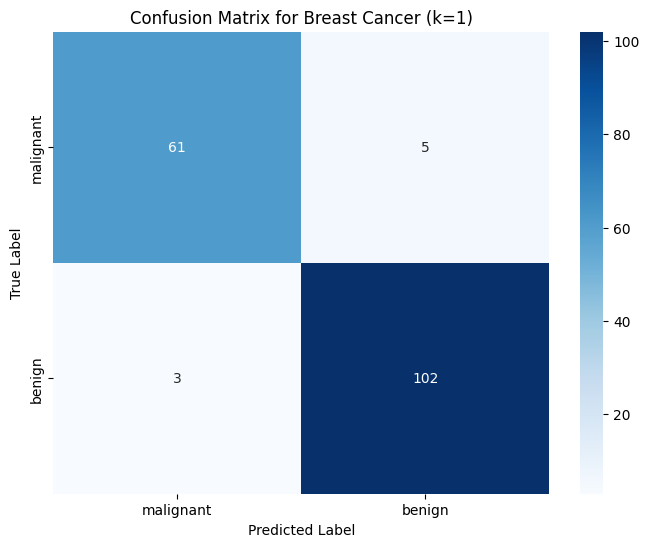

In [1]:
# ---------------------------------------------------
# ส่วนที่ 1: Import Libraries ที่จำเป็น
# ---------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("Libraries imported successfully!")

# ---------------------------------------------------
# ส่วนที่ 2: โหลดและเตรียมข้อมูล (Data Loading and Preparation)
# ---------------------------------------------------

# 2.1 โหลดข้อมูล Breast Cancer จาก Scikit-learn
cancer = load_breast_cancer()

# 2.2 สร้าง DataFrame ด้วย Pandas เพื่อให้จัดการข้อมูลได้ง่าย
# cancer.data คือข้อมูล features ทั้งหมด
# cancer.feature_names คือชื่อของ features แต่ละตัว
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# 2.3 เพิ่มคอลัมน์ 'target' เข้าไปใน DataFrame
# cancer.target คือคำตอบ (0=Malignant, 1=Benign)
df_cancer['target'] = cancer.target

print("\nตัวอย่าง 5 แถวแรกของข้อมูล:")
print(df_cancer.head())

# 2.4 แยกข้อมูลเป็น Features (X) และ Target (y)
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

# 2.5 แบ่งข้อมูลเป็นชุดสำหรับฝึกฝน (Train) และชุดสำหรับทดสอบ (Test)
# test_size=0.3 หมายถึงแบ่งข้อมูล 30% ไว้สำหรับทดสอบ
# random_state=101 เพื่อให้ผลการสุ่มเหมือนกันทุกครั้งที่รันโค้ด
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.3, random_state=101
)

print(f"\nขนาดของ Training set: {X_train_c.shape}")
print(f"ขนาดของ Test set: {X_test_c.shape}")


# ---------------------------------------------------
# ส่วนที่ 3: การทำ Feature Scaling
# ---------------------------------------------------
# สร้าง object ของ StandardScaler
scaler_c = StandardScaler()

# ทำการ fit และ transform บนข้อมูล Train set
# โมเดลจะเรียนรู้ค่าเฉลี่ยและส่วนเบี่ยงเบนมาตรฐานจาก Train set นี้เท่านั้น
X_train_c_scaled = scaler_c.fit_transform(X_train_c)

# ใช้ scaler ที่เรียนรู้จาก Train set มา transform ข้อมูล Test set
# เพื่อไม่ให้ข้อมูลจาก Test set รั่วไหล (leak) ไปยังกระบวนการ train
X_test_c_scaled = scaler_c.transform(X_test_c)

print("\nFeature Scaling เสร็จสิ้น")


# ---------------------------------------------------
# ส่วนที่ 4: สร้าง, ฝึกฝน และประเมินผลโมเดล k-NN
# ---------------------------------------------------

# 4.1 สร้างและฝึกฝนโมเดล k-NN (เริ่มต้นด้วย k=1 ตามใบงาน)
knn_cancer = KNeighborsClassifier(n_neighbors=1)
knn_cancer.fit(X_train_c_scaled, y_train_c)

print("\nโมเดล k-NN (k=1) ถูกฝึกฝนเรียบร้อยแล้ว")

# 4.2 ทำนายผลบนข้อมูล Test set ที่ผ่านการ Scale แล้ว
predictions_c = knn_cancer.predict(X_test_c_scaled)

# 4.3 ประเมินผลโมเดล
print("\n--- ผลลัพธ์สำหรับ k=1 ---")

# แสดง Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_c, predictions_c)
print(cm)

# แสดง Classification Report
print("\nClassification Report:")
# cancer.target_names จะแสดงชื่อคลาส ('malignant', 'benign')
report = classification_report(y_test_c, predictions_c, target_names=cancer.target_names)
print(report)


# ---------------------------------------------------
# ส่วนที่ 5: แสดงผล Confusion Matrix เป็นภาพ (Optional)
# ---------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, 
            yticklabels=cancer.target_names)
plt.title('Confusion Matrix for Breast Cancer (k=1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
# Accuracy: ประมาณ 95% (จาก accuracy ใน classification_report)

# False Negative (FN): คือกรณีที่โมเดลทำนายว่าเนื้องอกเป็น Benign (เนื้อดี) แต่ในความเป็นจริงมันคือ Malignant (เนื้อร้าย)

# False Positive (FP): คือกรณีที่โมเดลทำนายว่าเนื้องอกเป็น Malignant (เนื้อร้าย) แต่ในความเป็นจริงมันคือ Benign (เนื้อดี)

# ความผิดพลาดที่อันตรายกว่า: False Negative (FN) อันตรายกว่ามาก เพราะหมายถึงผู้ป่วยที่เป็นโรคอาจไม่ได้รับการรักษาที่ทันท่วงที ซึ่งอาจส่งผลร้ายแรงถึงชีวิต ในขณะที่ False Positive อาจทำให้ผู้ป่วยต้องตรวจเพิ่มเติมซึ่งสร้างความกังวลและค่าใช้จ่าย แต่ไม่ร้ายแรงเท่าการพลาดการรักษา

# ความสำคัญของ Recall (malignant): ค่านี้บอกว่า "ในบรรดาผู้ป่วยที่เป็นเนื้อร้ายทั้งหมด โมเดลของเราตรวจจับเจอได้กี่เปอร์เซ็นต์" ในทางการแพทย์ เราต้องการให้ค่านี้สูงที่สุดเท่าที่จะเป็นไปได้ (เข้าใกล้ 1.0) เพื่อลดจำนวนเคส False Negative ให้น้อยที่สุด